In [1]:
# 크롤링에 필요한 import

import pandas as pd
from pandas import Series , DataFrame
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup
import time
import urllib.request
import re
import numpy as np

# 시각화에 필요한 import

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 상관분석
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [ ]:
# 이미지 크롤링(google)

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3) 
driver.get("https://www.google.com/")
time.sleep(0.3)

ls = ['코카콜라355ml', '나랑드사이다245', '코카콜라제로캔', '칠성사이다제로캔', '핫식스오리지널(롯데칠성)250', '펩시제로355', '스프라이트제로500', '스프라이트355', 
      '레쓰비캔커피150ml', '칸타타콘트라베이스스위트블랙', '바리스타룰스에스프레소라떼', '레쓰비그란데헤이즐넛500', '웰치스 포도 355ml','환타 오렌지 355ml',
      '티오피 블랙 380ml']

for i in range(0,len(ls)) :
    a = ls[i]
    driver.get("https://www.google.com")
    time.sleep(0.3)
    target = driver.find_element_by_css_selector("[name = 'q']")
    target.send_keys(str(a))
    target.send_keys(Keys.ENTER)
    time.sleep(0.3)
    bt = driver.find_element_by_css_selector('#hdtb-msb > div:nth-child(1) > div > div:nth-child(2) > a')
    bt.click()
    
    for j in range(1,25) :
        images = driver.find_element_by_css_selector("#islrg > div.islrc > div:nth-child("+ str(j) +") > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")
        img_url =  images.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/'+a+'_'+str(j)+'.png')
    driver.execute_script("window.scrollTo(0, 1700)")
    time.sleep(1)
    for n in range(26,50) :
        images = driver.find_element_by_css_selector("#islrg > div.islrc > div:nth-child("+ str(n) +") > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")
        img_url =  images.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/'+a+'_'+str(n-1)+'.png')
       


In [102]:
# 이미지 크롤링(naver)

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)
driver.get("https://www.naver.com/")
time.sleep(0.3)

ls = ['코카콜라355ml', '나랑드사이다245', '코카콜라제로캔', '칠성사이다제로캔', '핫식스오리지널(롯데칠성)250', '펩시제로355', '스프라이트제로500', '스프라이트355', 
      '레쓰비캔커피150ml', '칸타타콘트라베이스 스위트블랙', '바리스타룰스에스프레소라떼', '레쓰비그란데헤이즐넛500', '웰치스 포도 355ml','환타 오렌지 355ml',
      '티오피 블랙 380ml']

for i in range(0,len(ls)) :
    a = ls[i]
    driver.get("https://search.naver.com/search.naver?where=image&sm=tab_jum&query="+a)
    time.sleep(0.3)
    for n in range(1, 11) :
        images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.viewer_group._viewerRoot > div > div.viewer_scroll._scrollContainer > div.viewer_flick > div.api_pcpg_wrap > div > div > div.image_area._queryImage > div.image._imageBox > img")        
        img_url =  images.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/'+a+'_'+str(n+48)+'.png')
        time.sleep(0.1)
    for k in range(21, 31) :
        images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(k)+") > div > div.thumb > a > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.viewer_group._viewerRoot > div > div.viewer_scroll._scrollContainer > div.viewer_flick > div.api_pcpg_wrap > div > div > div.image_area._queryImage > div.image._imageBox > img")
        img_url =  images_2.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/'+a+'_'+str(k+48)+'.png')
        time.sleep(0.1)          

<ipython-input-102-3b8a5f85eafd>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Temp/chromedriver')
<ipython-input-102-3b8a5f85eafd>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")


In [12]:
# 이미지 크롤링 _ 2

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)
driver.get("https://www.naver.com/")
time.sleep(0.3)
ls = ['조지아크래프트블랙', '스타벅스 컵커피 카페라떼', '포카리스웨트 500ml',
      '파워에이드 마운틴블라스트 600ml', '토레타 500ml', '게토레이 레몬 600ml',
      '파워오투 오렌지', '이온 더핏 500ml', '하늘보리 페트 500ml', '허니유자 페트 280ml ',
      '광동 옥수수 수염차 페트 500ml', '광동 헛개차 페트 500ml', '카프리썬 오렌지', '미닛메이드 오리지널 오렌지', '피크닉 사과']
for i in range(0,len(ls)) :
    a = ls[i]
    driver.get("https://search.naver.com/search.naver?where=image&sm=tab_jum&query="+a)
    time.sleep(0.5)
    for n in range(1, 11) :
        images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
        img_url =  images.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/nv/'+a+'_'+str(n+48)+'.png')
        time.sleep(0.3)

<ipython-input-12-780fa3b6c056>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Temp/chromedriver')
<ipython-input-12-780fa3b6c056>:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")


In [ ]:
# 이미지 크롤링 _2

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)
driver.get("https://www.naver.com/")
time.sleep(0.3)

ls = ['하늘보리 페트 500ml','광동 옥수수 수염차 페트 500ml']

for i in range(0,len(ls)) :
    a = ls[i]
    driver.get("https://search.naver.com/search.naver?where=image&sm=tab_jum&query="+a)
    time.sleep(0.5)
    for n in range(1, 11) :
        images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
        img_url =  images.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n+48)+'.png')
        time.sleep(0.3)
        for j in range(1,11) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(j)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(j)+'.png')
        for n in range(12,21) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n)+'.png')
        driver.execute_script("window.scrollTo(0, 1700)")
        time.sleep(0.5)
        for n in range(22,31) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n)+'.png')
        driver.execute_script("window.scrollTo(0, 2700)")
        time.sleep(0.5)
        for n in range(32,41) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n)+'.png')
        driver.execute_script("window.scrollTo(0, 3700)")
        time.sleep(0.3)
        for n in range(42,51) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n)+'.png')
        driver.execute_script("window.scrollTo(0, 4700)")
        time.sleep(0.3)
        for n in range(52,61) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n)+'.png')
        driver.execute_script("window.scrollTo(0, 5700)")
        time.sleep(0.3)
        for n in range(62,71) :
            images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
            img_url =  images.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'FIFY/nv2/'+a+'_'+str(n)+'.png')
        driver.execute_script("window.scrollTo(0, 6700)")
        time.sleep(0.3)        

In [ ]:
# 이미지 크롤링 _ 추가 (google)

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3) 
driver.get("https://www.google.com/")
time.sleep(0.3)

ls = ['칠성사이다 355ml']

for i in range(0,len(ls)) :
    a = ls[i]
    driver.get("https://www.google.com")
    time.sleep(0.3)
    target = driver.find_element_by_css_selector("[name = 'q']")
    target.send_keys(str(a))
    target.send_keys(Keys.ENTER)
    time.sleep(0.3)
    bt = driver.find_element_by_css_selector('#hdtb-msb > div:nth-child(1) > div > div:nth-child(2) > a')
    bt.click()
    
    for j in range(1,21) :
        images = driver.find_element_by_css_selector("#islrg > div.islrc > div:nth-child("+ str(j) +") > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#Sva75c > div > div > div.pxAole > div.tvh9oe.BIB1wf > c-wiz > div > div.OUZ5W > div.zjoqD > div.qdnLaf.isv-id > div > a > img")
        img_url =  images.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/추가/'+a+'_'+str(j)+'.png')
    driver.execute_script("window.scrollTo(0, 1900)")
    time.sleep(1)
    for n in range(22,25) :
        images = driver.find_element_by_css_selector("#islrg > div.islrc > div:nth-child("+ str(n) +") > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#Sva75c > div > div > div.pxAole > div.tvh9oe.BIB1wf > c-wiz > div > div.OUZ5W > div.zjoqD > div.qdnLaf.isv-id > div > a > img")
        img_url =  images_2.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/추가/'+a+'_'+str(n-1)+'.png')
    driver.execute_script("window.scrollTo(0, 3200)")
    time.sleep(1)    
    for n in range(28,47) :
        images = driver.find_element_by_css_selector("#islrg > div.islrc > div:nth-child("+ str(n) +") > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#Sva75c > div > div > div.pxAole > div.tvh9oe.BIB1wf > c-wiz > div > div.OUZ5W > div.zjoqD > div.qdnLaf.isv-id > div > a > img")
        img_url =  images_2.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/추가/'+a+'_'+str(n-1)+'.png')  


In [9]:
# 이미지 크롤링 _ 추가 (naver)

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)
driver.get("https://www.naver.com/")
time.sleep(0.3)

ls = ['칠성사이다 355ml']
for i in range(0,len(ls)) :
    a = ls[i]
    driver.get("https://search.naver.com/search.naver?where=image&sm=tab_jum&query="+a)
    time.sleep(0.3)
    for n in range(1, 11) :
        images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.viewer_group._viewerRoot > div > div.viewer_scroll._scrollContainer > div.viewer_flick > div.api_pcpg_wrap > div > div > div.image_area._queryImage > div.image._imageBox > img")
        img_url =  images_2.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/추가/'+a+'_'+str(n+43)+'.png')
        time.sleep(0.1)
    for k in range(21, 31) :
        images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(k)+") > div > div.thumb > a > img")
        images.click()
        time.sleep(0.2)
        images_2 = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.viewer_group._viewerRoot > div > div.viewer_scroll._scrollContainer > div.viewer_flick > div.api_pcpg_wrap > div > div > div.image_area._queryImage > div.image._imageBox > img")
        img_url =  images_2.get_attribute('src')
        urllib.request.urlretrieve(img_url, 'FIFY/추가/'+a+'_'+str(k+41)+'.png')
        time.sleep(0.1)        

<ipython-input-9-3e829400690f>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Temp/chromedriver')
<ipython-input-9-3e829400690f>:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  images = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.photo_group._listGrid > div.photo_tile._grid > div:nth-child("+str(n)+") > div > div.thumb > a > img")
<ipython-input-9-3e829400690f>:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  images_2 = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nimage._prs_img._imageSearchPC > div > div.viewer_group._viewerRoot > div > div.viewer_scroll._scrollContainer > div.viewer_flick > div.api_pcpg_wrap > div > div > div.image_area._queryImage > div.image._imageBox > img")
<ipython-input-9-3e829400690f>:20:

In [70]:
# 영양성분 크롤링

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3) 
driver.get("https://www.google.com/")
time.sleep(0.3)

ls = ['코카콜라 355ml', '나랑드 사이다 제로 245ml', '코카콜라제로 250ml', '칠성사이다 제로', '핫식스', '제로콜라 펩시', '스프라이트 제로', '스프라이트 355ml', 
      '레쓰비 150ml', '콘트라베이스 스위트 블랙', '바리스타룰스에스프레소라떼', '레쓰비 그란데 헤이즐넛', '웰치스 그레이프맛','환타 오렌지 355ml',
      '맥심 티오피 더블랙']
left = []
right = []
for i in range(0,len(ls)) :
    lf = []
    a = ls[i]
    driver.get("https://www.fatsecret.kr/%EC%B9%BC%EB%A1%9C%EB%A6%AC-%EC%98%81%EC%96%91%EC%86%8C/search?")
    time.sleep(0.3)
    target = driver.find_element_by_css_selector("[name = 'q']")
    target.send_keys(str(a))
    target.send_keys(Keys.ENTER)
    time.sleep(0.3)
    bt = driver.find_element_by_css_selector('#content > table > tbody > tr > td.leftCell > div > table > tbody > tr:nth-child(1) > td > a.prominent')
    bt.click()
    
    mllist = driver.find_elements_by_css_selector('.serving_size.black.serving_size_label')
    mrlist = driver.find_elements_by_css_selector('.serving_size.black.serving_size_value')
    llist = driver.find_elements_by_css_selector('.nutrient.left')
    rlist = driver.find_elements_by_css_selector('.nutrient.right.tRight')
    
    for m in mllist :
        left.append(m.text)
    for n in mrlist :
        right.append(n.text)
    for Ll in llist :
        lf.append(Ll.text)
    for r in rlist :
        right.append(r.text)
    left.extend(lf)

    
product_name = []

for i in ls :
    for j in range(11) :
        product_name.append(i)
for k in range(10) :
    product_name.append('없음')        

# df = pd.DataFrame({'left' : left, 'right' : right, 'product_name' : product_name})
# pd.set_option('display.max_rows', None)
# df

with open("FIFY/nutrient.csv","wt", encoding="utf-8") as f :
    f.write('left,right,product_name\n')
    for i in range(len(right)):
        f.write(left[i]+","+right[i]+","+product_name[i]+'\n')

<ipython-input-70-8f4a81c505e1>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Temp/chromedriver')
<ipython-input-70-8f4a81c505e1>:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  target = driver.find_element_by_css_selector("[name = 'q']")
<ipython-input-70-8f4a81c505e1>:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bt = driver.find_element_by_css_selector('#content > table > tbody > tr > td.leftCell > div > table > tbody > tr:nth-child(1) > td > a.prominent')
<ipython-input-70-8f4a81c505e1>:30: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  mllist = driver.find_elements_by_css_selector('.serving_size.black.serving_size_label')
<ipython-input-70-8f4a81c505e1>:31: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_eleme

In [ ]:
# 영양성분 데이터 전처리

df = pd.read_csv("FIFY/nutrient_2.csv")
df2 = df.copy()
df2 = df2.pivot(columns='left', values='right')
df2


In [ ]:
# csv 전처리
# 서빙 사이즈 serving_size
ss = df2.iloc[:,5]
ss = ss.dropna(axis=0)
ss = ss.reset_index(drop = True)
ss

# 열량(kJ) calorie(kJ)
kJ = df2.iloc[:,8]
kJ = kJ.dropna(axis=0)
kJ = kJ.reset_index(drop = True)
kJ

# 열량(kc) calorie(kcal)
kc = df2.iloc[:,0]
kc = kc.dropna(axis=0)
kc = kc.reset_index(drop = True)
kc

# 나트륨 salt
st = df2.iloc[:,1]
st = st.dropna(axis=0)
st = st.reset_index(drop = True)
st

# 다불포화지방(전부 0.000mg) fat_5
f5 = df2.iloc[:,2]
f5 = f5.dropna(axis=0)
f5 = f5.reset_index(drop = True)
f5

# 단백질 protein
pr = df2.iloc[:,3]
pr = pr.dropna(axis=0)
pr = pr.reset_index(drop = True)
pr

# 칼륨(전부 0mg) potassium
pt = df2.iloc[:,10]
pt = pt.dropna(axis=0)
pt = pt.reset_index(drop = True)
pt

# 불포화지방(전부 0.000mg) fat_4
f4 = df2.iloc[:,4]
f4 = f4.dropna(axis=0)
f4 = f4.reset_index(drop = True)
f4

# 설탕당 sugar
su = df2.iloc[:,6]
su = su.dropna(axis=0)
su = su.reset_index(drop = True)
su

# 식이섬유 dietary_fiber
fb = df2.iloc[:,7]
fb = fb.dropna(axis=0)
fb = fb.reset_index(drop = True)
fb

# 지방 fat_1
f1 = df2.iloc[:,9]
f1 = f1.dropna(axis=0)
f1 = f1.reset_index(drop = True)
f1

# 콜레스테롤 cholesterol
ch = df2.iloc[:,11]
ch = ch.dropna(axis=0)
ch = ch.reset_index(drop = True)
ch

# 탄수화물 carbohydrate
cb = df2.iloc[:,12]
cb = cb.dropna(axis=0)
cb = cb.reset_index(drop = True)
cb

# 트랜스 지방 fat_3
f3 = df2.iloc[:,13]
f3 = f3.dropna(axis=0)
f3 = f3.reset_index(drop = True)
f3

# 포화지방 fat_2
f2 = df2.iloc[:,14]
f2 = f2.dropna(axis=0)
f2 = f2.reset_index(drop = True)
f2

In [245]:
# csv 저장
with open("FIFY/nutrient_3.csv","wt", encoding="utf-8") as f :
    f.write('product_name,serving_size,calorie_kJ,calorie_kcal,carbohydrate,sugar,protein,fat,fat_2,fat_3,cholesterol,salt,\n')
    for i in range(len(ls)):
        f.write(ls[i]+","+ss[i]+","+kJ[i]+","+kc[i]+","+cb[i]+","+su[i]+","+pr[i]+","+f1[i]+","+f2[i]+","+f3[i]+","+ch[i]+","+st[i]+'\n')

In [8]:
# csv _ final

data = pd.read_csv("FIFY/nutrient_3.csv")

v1 = []
v2 = []
for i in range(30) :
    voice_1 = re.sub("[(,)]",'',data.iloc[i,1]) + '안에' + data.iloc[i,3] + '가 있습니다.'
    v1.append(voice_1)
    voice_2 = '설탕당은 ' + data.iloc[i,5] + ' 지방은 ' + data.iloc[i,7] + ' 나트륨은 ' + data.iloc[i,15] + ' 이 포함되어있습니다.'
    v2.append(voice_2)

data['voice_1'] = v1
data['voice_2'] = v2

class_name = ['TOP_black', 'baristarules_espressolatte', 'cafrisun', 'chilsungcider', 'chilsungcider_zero', 
              'cocacola', 'cocacola_zero', 'contrabass_sweetblack', 'fanta_orange', 'gatorade_lemon', 
              'georgiacraft_black', 'haneulbori', 'heotgaecha', 'honeyyuja', 'hotsix_org', 'letsbe', 
              'letsbe_grande_hazelnut', 'minutemaid_org_orange', 'narangdcider', 'oksususuyeomcha', 
              'pepsi_zero', 'picnic_apple', 'pocarisweat', 'powerO2_orange', 'powerade_mountainblast', 
              'sprite', 'sprite_zero', 'starbucks_cafelatte', 'toreta', 'welchs_grape']

data.insert(0,'class_name',class_name)
data.to_csv("FIFY/nutrient_final.csv", index = False )

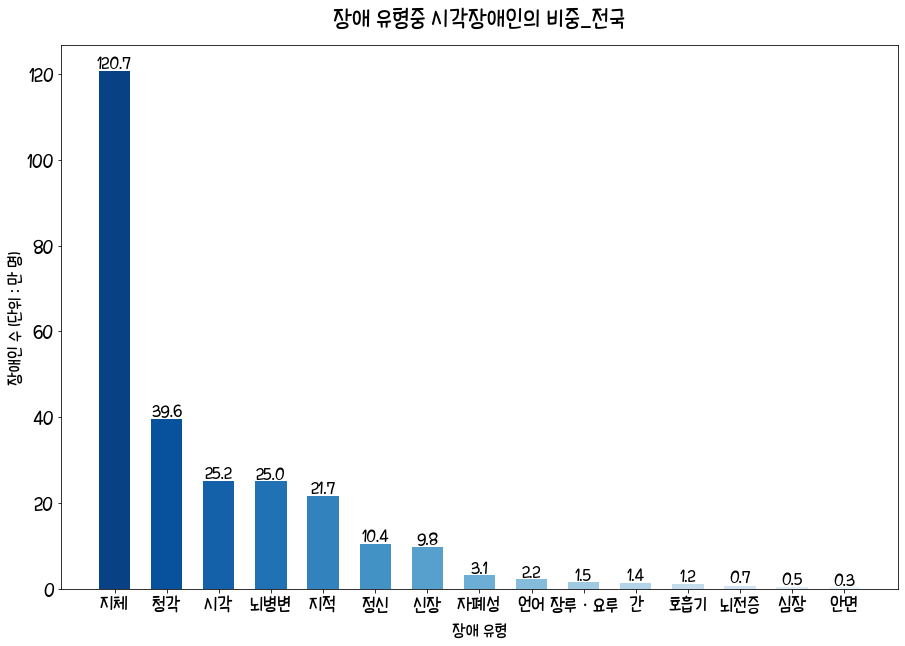

In [231]:
# 시각화  _  '장애 유형중 시각장애인의 비중_전국'

df = pd.read_csv("FIFY/시도별_장애유형별_장애정도별_성별_등록장애인수.csv")
df = df.iloc[3:18,1:3]
df = df.set_index('장애유형별(1)')
df['2020'] = round(pd.to_numeric(df['2020'])/10000, 1)
df = df.sort_values(by = '2020', ascending = False)

plt.figure(figsize=(15,10))
mycolors = sns.color_palette('Blues_r',len(df.index))
plt.bar(df.index, df['2020'], color = mycolors, width=0.6)
title_font = {'fontsize': 25, 'fontweight': 'bold', 'color': 'black'}
plt.title('장애 유형중 시각장애인의 비중_전국', fontdict=title_font, pad = 20)
plt.ylabel('장애인 수 (단위 : 만 명)', size=18)
plt.xlabel('장애 유형', size=18, labelpad = 10)
plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
x_values = range(15)
y_values = df['2020']
for i, v in enumerate(x_values):
    plt.text(v, y_values[i], y_values[i], fontsize = 18, color = 'black', horizontalalignment='center', verticalalignment = 'bottom')
plt.savefig("FIFY/장애 유형중 시각장애인의 비중_전국.png")

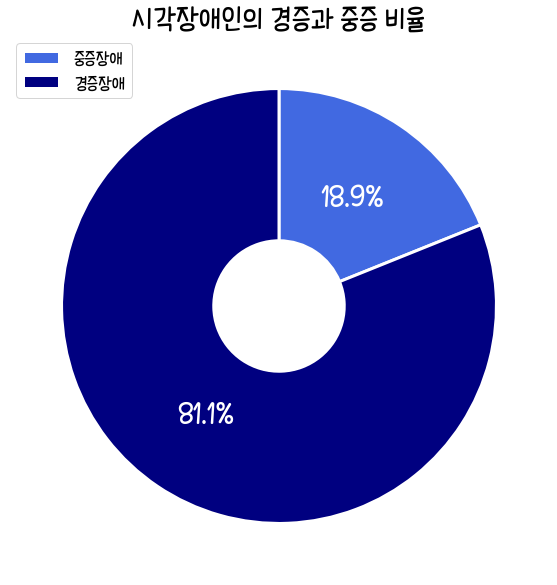

In [7]:
# 시각화  _  '심한장애와 심하지 않은 장애 비중 '

df = pd.read_csv("FIFY/시도별_장애유형별_장애정도별_성별_등록장애인수.csv")
df2 = df.iloc[4:5,2:9]
df2 = df2.astype(float)
# 전체 2020 심한 2020.3 심하지 않은 2020.6
df2 = pd.DataFrame({'data' : [df2.iloc[0,3]/df2.iloc[0,0]*100, 
                              df2.iloc[0,6]/df2.iloc[0,0]*100]}, index = ['심한장애','심하지않은장애'])

fig = plt.figure(figsize=(10,10))
ratio = df2['data']
labels = ['중증장애', '경증장애']
picolors = ['royalblue', 'navy']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(ratio, autopct='%.1f%%', startangle=90, counterclock=False, colors=picolors, wedgeprops=wedgeprops, textprops={'size': 30, 'color' : 'white', 'fontweight': 'bold'})
title_font = {'fontsize': 30, 'fontweight': 'bold', 'color': 'black'}
plt.title("시각장애인의 경증과 중증 비율", fontdict=title_font)
plt.legend(labels, fontsize = 18)
plt.savefig("FIFY/시각장애인의 경증과 중증 비율.png", transparent = True)

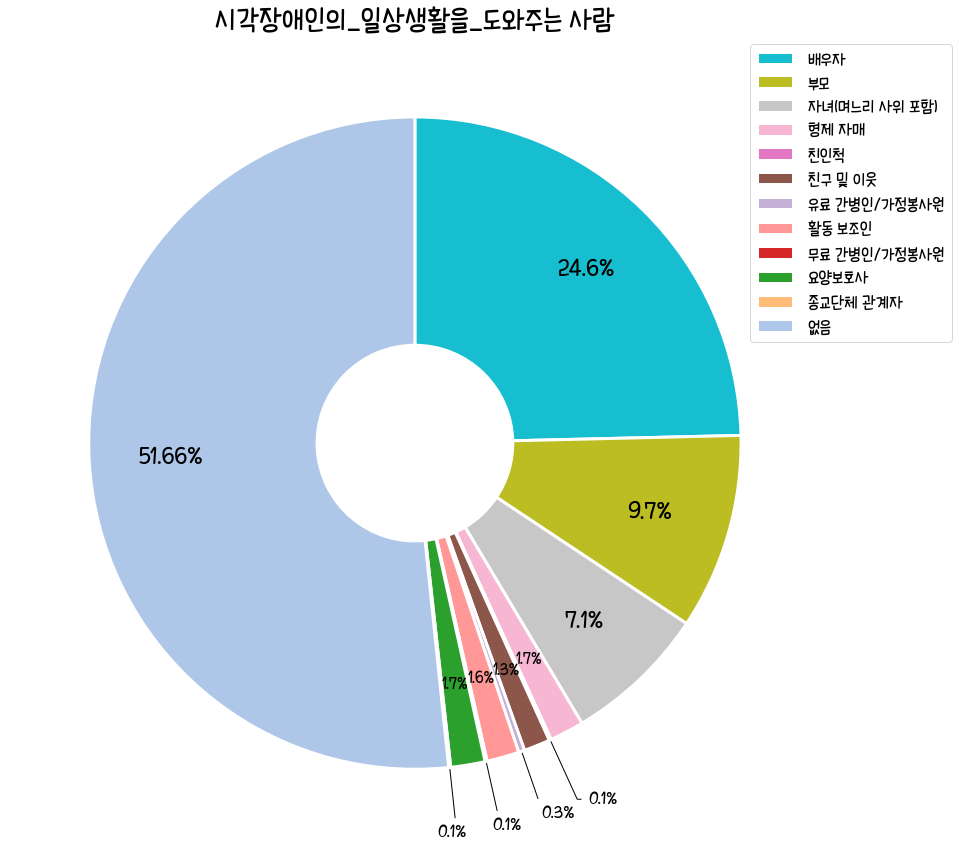

In [93]:
# 일상생활_도와주는 사람_1순위   _도움을 안받고 싶어하는 사람이 많다. (파이)

df = pd.read_csv("FIFY/일상생활_도와주는_사람_1순위.csv")
df1 = df.iloc[6:7,3:17]
df1.columns = ['배우자','부모','자녀(며느리 사위 포함)','형제 자매','친인척','친구 및 이웃','유료 간병인/가정봉사원','활동 보조인','무료 간병인/가정봉사원','요양보호사','종교단체 관계자','사회복지사','기타','없음']
df1 = df1.drop(['기타', '사회복지사'], axis = 'columns')
df1 = df1.astype(float)

ratio = df1.iloc[0,:]
labels = df1.columns
picolors = sns.color_palette('tab20_r',len(ratio))

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
pie = ax.pie(ratio, startangle=90, counterclock=False, 
        colors=picolors, wedgeprops=wedgeprops)

title_font = {'fontsize': 30, 'fontweight': 'bold', 'color': 'black'}
plt.title("시각장애인의_일상생활을_도와주는 사람", fontdict=title_font)
total = np.sum(ratio)

threshold = 1 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{ratio[i]/total*100:.2f}')
        text = f'{ratio[i]/total*100:.1f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if ratio[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        horizontalalignment = {-1: "left", 1: "right"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize = 18)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2))*1.5 + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2))*1.5 + center[1] ## 텍스트 y좌표
        if ratio[i]/total*100 < 2 :
            ax.text(x,y,text,ha='center',va='center',fontsize=17)
        else :
            ax.text(x,y,text,ha='center',va='center',fontsize=25)

plt.legend(labels, fontsize = 18, bbox_to_anchor=(0.9, 1.0))
plt.savefig("FIFY/시각장애인의_일상생활을_도와주는 사람.png", transparent = True)

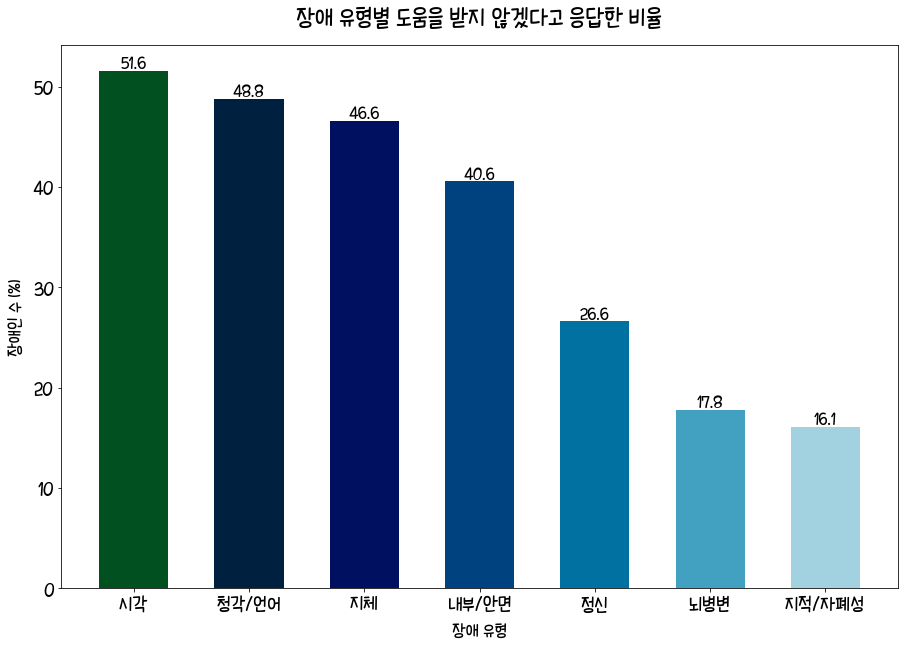

In [94]:
# 유형중에서도 시각장애인은 도움을 안받는 사람이 많다.

df = pd.read_csv("FIFY/일상생활_도와주는_사람_1순위.csv")
df2 = df.iloc[4:11,16:17]
df2 = df2.astype(float)
df2.index = ['지체', '뇌병변', '시각', '청각/언어', '지적/자폐성', '정신', '내부/안면']
df2 = df2.sort_values(by = '2019.14' , ascending = False)

plt.figure(figsize=(15,10))
mycolors = sns.color_palette('ocean',len(df2.index))
plt.bar(df2.index, df2['2019.14'], color = mycolors, width=0.6)
title_font = {'fontsize': 25, 'fontweight': 'bold', 'color': 'black'}
plt.title('장애 유형별 도움을 받지 않겠다고 응답한 비율', fontdict=title_font, pad = 20)
plt.ylabel('장애인 수 (%)', size=18, labelpad = 10)
plt.xlabel('장애 유형', size=18, labelpad = 10)
plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
x_values = df2.index
y_values = df2['2019.14']
for i, v in enumerate(x_values):
    plt.text(v, y_values[i], y_values[i], fontsize = 18, color = 'black', horizontalalignment='center', verticalalignment = 'bottom')
plt.savefig("FIFY/장애 유형별 도움을 받지 않겠다고 응답한 비율.png")

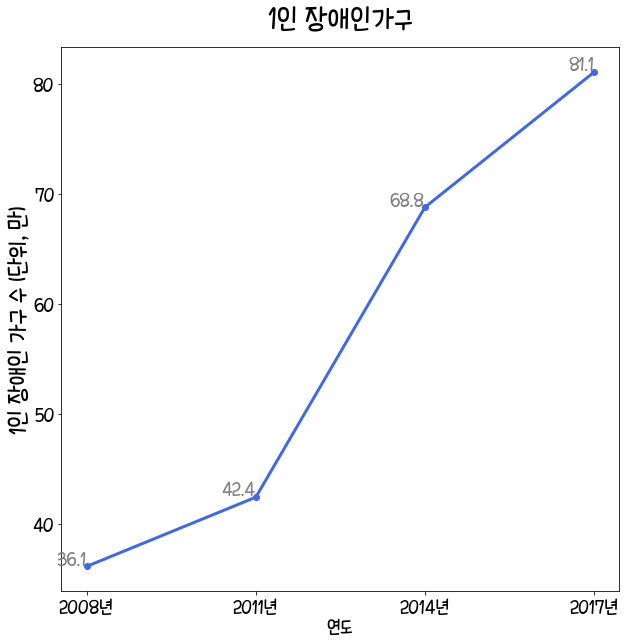

In [95]:
# 1인 장애인 가구 증가

df = pd.read_csv("FIFY/장애인_가구와_비장애인_가구의_가구규모.csv")
df3 = df.loc[4 , ['2008', '2011.2', '2014.2', '2017.2']]
df3.index = ['2008년', '2011년', '2014년', '2017년']
df3 = df3.astype(float)
df3[0] = df3[0]*2442442/100
df3 = df3/10000

fig = plt.figure(figsize=(10,10))
x_values = df3.index
y_values = round(df3, 1)

plt.plot(x_values, y_values,color = 'royalblue', marker = 'o', linewidth=3)
plt.xlabel('연도', fontsize = 20, color = 'black')
plt.ylabel('1인 장애인 가구 수 (단위, 만)', fontsize = 25, color = 'black')
plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
title_font = {'fontsize': 30, 'fontweight': 'bold', 'color': 'black'}
plt.title("1인 장애인가구", fontdict=title_font, pad = 20)
for i, v in enumerate(x_values):
    plt.text(v, y_values[i], y_values[i], fontsize = 20, 
             color = 'grey', horizontalalignment='right', verticalalignment = 'bottom')
    
plt.savefig("FIFY/1인_장애인가구_증가.png") 

In [16]:
# 저시력자 워드 크롤링

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)
driver.get("https://www.naver.com/")
time.sleep(0.3)

target = driver.find_element_by_css_selector("[name = 'query']")
a = '저시력자'
target.send_keys(str(a))
target.send_keys(Keys.ENTER)
bt = driver.find_element_by_css_selector('#lnb > div.lnb_group > div > ul > li:nth-child(8) > a')
bt.click()

title = []

for page in range(20) :
    titleList =  driver.find_elements_by_tag_name('a.news_tit')
    for tit in titleList :
        content = tit.text
        content = re.sub(",", '', content)
        content = content.strip()    
        title.append(content)
    nxt = driver.find_element_by_css_selector('#main_pack > div.api_sc_page_wrap > div > a.btn_next')
    nxt.click()
    time.sleep(0.2)
    
with open("FIFY/저시력자.csv","wt", encoding="utf-8") as f :
    f.write('title\n')
    for i in range(len(title)):
        f.write(title[i]+'\n')
    

<ipython-input-16-a6718d0afacc>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Temp/chromedriver')
<ipython-input-16-a6718d0afacc>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  target = driver.find_element_by_css_selector("[name = 'query']")
<ipython-input-16-a6718d0afacc>:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bt = driver.find_element_by_css_selector('#lnb > div.lnb_group > div > ul > li:nth-child(8) > a')
<ipython-input-16-a6718d0afacc>:18: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  titleList =  driver.find_elements_by_tag_name('a.news_tit')
<ipython-input-16-a6718d0afacc>:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  nxt = driver.find_element_by_css_selector('#main_pack > div.

In [ ]:
# '저시력자' 전처리 및 txt파일로 전환

df = pd.read_csv("FIFY/저시력자.csv")
pd.set_option('display.max_rows', None)
df = df['title']

new = []
for i in df :
    d = re.sub("[^가-힣,\s]", "", i)
    new.append(d)
    
aa = []
for i in aa :
    d = re.sub("[저시력자]", "", i)
    aa.append(d)
    
data = pd.DataFrame({'title' : aa})
data.to_csv('FIFY/저시력자.txt', sep = '\n', index = False)

In [16]:
# '장애인 어플' 전처리 및 txt파일로 전환

df = pd.read_csv("FIFY/저시력자2.csv")
pd.set_option('display.max_rows', None)
df = df['title']

new = []
for i in df :
    d = re.sub("[^가-힣,\s]", "", i)
    new.append(d)

kk = []
for i in new :
    d = re.sub("[장애인어플]", "",i)
    kk.append(d)

data = pd.DataFrame({'title' : kk})
data
data.to_csv('FIFY/장애인어플.txt', sep = '\n', index = False)

In [ ]:
# 상관분석

def weekday2weeknumber(age):
    if age < 10:
        ageRange = '10세 미만'
    elif age >= 10 and age < 13:
        ageRange = '10대 초반'
    elif age >= 13 and age < 17:
        ageRange = '10대 중반'
    elif age >= 17 and age < 20:
        ageRange = '10대 후반'
    elif age >= 20 and age < 23:
        ageRange = '20대 초반'
    elif age >= 23 and age < 27:
        ageRange = '20대 중반'
    elif age >= 27 and age < 30:
        ageRange = '20대 후반'
    elif age >= 30 and age < 33:
        ageRange = '30대 초반'
    elif age >= 33 and age < 37:
        ageRange = '30대 중반'
    elif age >= 37 and age < 40:
        ageRange = '30대 후반'
    elif age >= 40 and age < 43:
        ageRange = '40대 초반'
    elif age >= 43 and age < 47:
        ageRange = '40대 중반'
    elif age >= 47 and age < 50:
        ageRange = '40대 후반'
    elif age >= 50 and age < 53:
        ageRange = '50대 초반'
    elif age >= 53 and age < 57:
        ageRange = '50대 중반'
    elif age >= 57 and age < 60:
        ageRange = '50대 후반'
    elif age >= 60 and age < 63:
        ageRange = '60대 초반'
    elif age >= 63 and age < 67:
        ageRange = '60대 중반'
    elif age >= 67 and age < 70:
        ageRange = '60대 후반'
    elif age >= 70 and age < 73:
        ageRange = '70대 초반'
    elif age >= 73 and age < 77:
        ageRange = '70대 중반'
    elif age >= 77 and age < 80:
        ageRange = '70대 후반'
    else:
        ageRange = '80세 이상'
    return ageRange

# 데이터 전처리

for i in range(8, 20) :
    hn = pd.read_csv("FIFY/국민건강영양조사/hn"+ str(i) + "_all.csv")
    # 'N_DUSUAL' (1 count == 과식)
    if i == 11 or i == 19 :
        DUSUAL_1 = hn[['age', 'N_DUSUAL']]
        n_age = DUSUAL_1['age'].map(weekday2weeknumber)
        DUSUAL_1['age'] = n_age
        N_D = DUSUAL_1['N_DUSUAL'] == '1'
        DUSUAL_1 = DUSUAL_1[N_D]
        DUSUAL_1 = DUSUAL_1.groupby(DUSUAL_1['age']).count()
        DUSUAL_1.rename(columns = {'N_DUSUAL' : 'N_DUSUAL_1'}, inplace = True)
        DUSUAL_1.to_csv('FIFY/분석/DUSUAL'+ str(i) + '_1.csv')
        
       # 'N_DUSUAL' (2 count == 소식)
        DUSUAL_2 = hn[['age', 'N_DUSUAL']]
        n_age = DUSUAL_2['age'].map(weekday2weeknumber)
        DUSUAL_2['age'] = n_age
        N_D2 = DUSUAL_2['N_DUSUAL'] == '3'
        DUSUAL_2 = DUSUAL_2[N_D2]
        DUSUAL_2 = DUSUAL_2.groupby(DUSUAL_2['age']).count()
        DUSUAL_2.rename(columns = {'N_DUSUAL' : 'N_DUSUAL_2'}, inplace = True)
        DUSUAL_2.to_csv('FIFY/분석/DUSUAL'+ str(i) + '_2.csv')     
        
    else :
        DUSUAL_1 = hn[['age', 'N_DUSUAL']]
        n_age = DUSUAL_1['age'].map(weekday2weeknumber)
        DUSUAL_1['age'] = n_age
        N_D = DUSUAL_1['N_DUSUAL'] == 1
        DUSUAL_1 = DUSUAL_1[N_D]   
        DUSUAL_1 = DUSUAL_1.groupby(DUSUAL_1['age']).count()
        DUSUAL_1.rename(columns = {'N_DUSUAL' : 'N_DUSUAL_1'}, inplace = True)
        DUSUAL_1.to_csv('FIFY/분석/DUSUAL'+ str(i) + '_1.csv')
    
        # 회귀분석 _ 'N_DUSUAL' (2 count == 소식)
        DUSUAL_2 = hn[['age', 'N_DUSUAL']]
        n_age = DUSUAL_2['age'].map(weekday2weeknumber)
        DUSUAL_2['age'] = n_age
        N_D2 = DUSUAL_2['N_DUSUAL'] == 3
        DUSUAL_2 = DUSUAL_2[N_D2] 
        DUSUAL_2 = DUSUAL_2.groupby(DUSUAL_2['age']).count()
        DUSUAL_2.rename(columns = {'N_DUSUAL' : 'N_DUSUAL_2'}, inplace = True)
        DUSUAL_2.to_csv('FIFY/분석/DUSUAL'+ str(i) + '_2.csv')
    
    
    # 'N_VA'
    if i == 19 :
        VA = hn[['age', 'N_VA_RAE']]
        n_age = VA['age'].map(weekday2weeknumber)
        VA['age'] = n_age
        VA = round(VA.groupby(VA['age']).mean(),2)
        VA.rename(columns = {'N_VA_RAE' : 'N_VA'}, inplace = True)
        VA.to_csv('FIFY/분석/VA19.csv')
    
    else :
        VA = hn[['age', 'N_VA']]
        n_age = VA['age'].map(weekday2weeknumber)
        VA['age'] = n_age
        VA = round(VA.groupby(VA['age']).mean(),2)
        VA.to_csv('FIFY/분석/VA'+ str(i) + '.csv')

    # 'N_WAT_C'
    WAT = hn[['age', 'N_WAT_C']]
    n_age = WAT['age'].map(weekday2weeknumber)
    WAT['age'] = n_age
    WAT = round(WAT.groupby(WAT['age']).mean(), 2)
    WAT.to_csv('FIFY/분석/WAT'+ str(i) + '.csv')
    
    # 'BS3_1' 현재 흡연 여부
    BS = hn[['age', 'BS3_1']]
    n_age = BS['age'].map(weekday2weeknumber)
    BS['age'] = n_age
    nl = []
    for j in BS['BS3_1'] :
        if j != 1 and j != 2 :
            d = np.nan
            nl.append(d)
        else :
            nl.append(j)
    BS['BS3_1'] = nl
    BS = BS.groupby(BS['age']).count()
    BS.rename(columns = {'BS3_1' : 'smoke'}, inplace = True)
    BS.to_csv('FIFY/분석/smoke'+ str(i) + '.csv')
    
    # HE_BMI
    BMI = hn[['age', 'HE_BMI']]
    n_age = BMI['age'].map(weekday2weeknumber)
    BMI['age'] = n_age
    BMI = round(BMI.groupby(BMI['age']).mean(), 2)
    BMI.to_csv('FIFY/분석/BMI'+ str(i) + '.csv')
    
    # HE_HP __고혈압 여부 3만 count
    HP = hn[['age', 'HE_HP']]
    n_age = HP['age'].map(weekday2weeknumber)
    HP['age'] = n_age
    nnl = []
    for k in HP['HE_HP'] :
        if k != 3 :
            d = np.nan
            nnl.append(d)
        else :
            nnl.append(k)
    HP['HE_HP'] = nnl
    HP = HP.groupby(HP['age']).count()
    HP.to_csv('FIFY/분석/HP'+ str(i) + '.csv')

    # N_CA  __칼슘 섭취량
    CA = hn[['age', 'N_CA']]
    n_age = CA['age'].map(weekday2weeknumber)
    CA['age'] = n_age
    CA = round(CA.groupby(CA['age']).mean(), 2)
    CA.to_csv('FIFY/분석/CA'+ str(i) + '.csv')
    
    # N_CHO __탄수화물 섭취량
    CHO = hn[['age', 'N_CHO']]
    n_age = CHO['age'].map(weekday2weeknumber)
    CHO['age'] = n_age
    CHO = round(CHO.groupby(CHO['age']).mean(), 2)
    CHO.to_csv('FIFY/분석/CHO'+ str(i) + '.csv')    

    # N_FAT  __지방
    FAT = hn[['age', 'N_FAT']]
    n_age = FAT['age'].map(weekday2weeknumber)
    FAT['age'] = n_age
    FAT = round(FAT.groupby(FAT['age']).mean(), 2)
    FAT.to_csv('FIFY/분석/FAT'+ str(i) + '.csv')  
    
    # N_PROT
    PROT = hn[['age', 'N_PROT']]
    n_age = PROT['age'].map(weekday2weeknumber)
    PROT['age'] = n_age
    PROT = round(PROT.groupby(PROT['age']).mean(), 2)
    PROT.to_csv('FIFY/분석/PROT'+ str(i) + '.csv')
    
    # BP8
    if i > 15 :
        pass
    else :
        BP = hn[['age', 'BP8']]
        n_age = BP['age'].map(weekday2weeknumber)
        BP['age'] = n_age
        BP.replace({88 : np.NaN, 99 : BP['BP8'].mean()}, inplace = True)
        BP = round(BP.groupby(BP['age']).mean(), 2)
        BP = BP.fillna(0)
        BP.to_csv('FIFY/분석/BP'+ str(i) + '.csv')    


In [ ]:
# target 데이터

for i in range(8, 13) :
    hn = pd.read_csv("FIFY/국민건강영양조사/hn"+str(i)+"_eye.csv")
    if i == 11 :
        target = hn[['age', 'E_CL_1', 'E_CR_1']]
        n_age = target['age'].map(weekday2weeknumber)
        target['age'] = n_age
        n_eye = []
        for j in range(len(target.index)) :
            if target.loc[j,'E_CR_1'] < target.loc[j,'E_CL_1'] :
                n_eye.append(target.loc[j,'E_CL_1'])
            else:
                n_eye.append(target.loc[j,'E_CR_1'])
    else :
        target = hn[['age', 'E_Cl_1', 'E_Cr_1']]
        n_age = target['age'].map(weekday2weeknumber)
        target['age'] = n_age
        n_eye = []
        for j in range(len(target.index)) :
            if target.loc[j,'E_Cr_1'] < target.loc[j,'E_Cl_1'] :
                n_eye.append(target.loc[j,'E_Cl_1'])
            else:
                n_eye.append(target.loc[j,'E_Cr_1'])
    target['n_eye'] = n_eye
    target = target[['age', 'n_eye']]
    target.replace({1 : np.NaN, 2 : np.NaN, 3 : np.NaN, 4 : np.NaN, 5 : np.NaN, 6 : np.NaN, 13 : np.NaN, 14 : np.NaN, 15: np.NaN, 16 : np.NaN, 88 : np.NaN, 99 : np.NaN}, inplace = True)
    target = target.groupby(target['age']).count()
    target.to_csv("FIFY/분석/target"+str(i)+".csv")

In [44]:
# 데이터 merge

for i in range(8, 13) :
    target = pd.read_csv("FIFY/분석/target"+str(i)+".csv")
    df1 = pd.read_csv("FIFY/분석/DUSUAL"+str(i)+"_1.csv")
    df2 = pd.read_csv("FIFY/분석/DUSUAL"+str(i)+"_2.csv")
    df3 = pd.read_csv("FIFY/분석/VA"+str(i)+".csv")
    df4 = pd.read_csv("FIFY/분석/WAT"+str(i)+".csv")
    df5 = pd.read_csv("FIFY/분석/CA"+str(i)+".csv")
    df6 = pd.read_csv("FIFY/분석/CHO"+str(i)+".csv")
    df7 = pd.read_csv("FIFY/분석/PROT"+str(i)+".csv")
    df8 = pd.read_csv("FIFY/분석/FAT"+str(i)+".csv")
    df9 = pd.read_csv("FIFY/분석/HP"+str(i)+".csv")
    df10 = pd.read_csv("FIFY/분석/BMI"+str(i)+".csv")
    df11 = pd.read_csv("FIFY/분석/smoke"+str(i)+".csv")
    df12 = pd.read_csv("FIFY/분석/FAM"+str(i)+".csv")
    df13 = pd.read_csv("FIFY/분석/SUN"+str(i)+".csv")
    df14 = pd.read_csv("FIFY/분석/BP"+str(i)+".csv")
    data = pd.concat([target.set_index('age'), df1.set_index('age'), df2.set_index('age'), df3.set_index('age'), df4.set_index('age'), df5.set_index('age'), df6.set_index('age'), 
                      df7.set_index('age'), df8.set_index('age'), df9.set_index('age'), df10.set_index('age'), df11.set_index('age'), df12.set_index('age'), df13.set_index('age'), 
                      df14.set_index('age')], axis=1)
    data.to_csv("FIFY/분석/merge_total"+str(i)+".csv")

In [ ]:
# 데이터 연령대 merge

li = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']
for j in li :
    df = pd.DataFrame(index=range(1), columns=['n_eye', 'N_DUSUAL_1', 'N_DUSUAL_2', 'N_VA', 'N_WAT_C', 'N_CA', 'N_CHO', 'N_PROT', 'N_FAT', 'HE_HP', 'HE_BMI', 'smoke'])
    for i in range(8,13) :
        data = pd.read_csv("FIFY/분석/merge_total"+str(i)+".csv")
        data.set_index('age', inplace = True)
        df = df.append(pd.Series(data.loc[j,:], index=df.columns), ignore_index=True)
    df.index = ['0', '2008', '2009', '2010', '2011', '2012']
    df.index.name = 'year'
    df.drop(index = '0', inplace = True)
    df.to_csv("FIFY/분석/merge_"+str(j)+".csv")

In [45]:
# TOTAL
df1 = pd.read_csv("FIFY/분석/merge_total8.csv")
for i in range(9, 13) :
    df2 = pd.read_csv("FIFY/분석/merge_total"+str(i)+".csv")
    df1 = df1 + df2
df1.set_index('age', inplace = True)
df1.reset_index(inplace = True)

ls = ['10대 중반', '10대 초반', '10대 후반', '10세 미만', '20대 중반', '20대 초반', '20대 후반', '30대 중반', '30대 초반', '30대 후반', 
      '40대 중반', '40대 초반', '40대 후반', '50대 중반', '50대 초반', '50대 후반', '60대 중반', '60대 초반', '60대 후반', '70대 중반', 
      '70대 초반', '70대 후반', '80세 이상']
for j in range(len(df1.index)) :
    df1.iloc[j,0] = ls[j]

df1[['N_VA', 'N_WAT_C', 'HE_BMI', 'N_CHO', 'N_CA','N_FAT', 'N_PROT', 'BP8']] = df1[['N_VA', 'N_WAT_C', 'HE_BMI', 'N_CHO', 'N_CA', 'N_FAT', 'N_PROT', 'BP8']]/5
df1.to_csv("FIFY/분석/08_12_TOTAL_2.csv", index = None)

,age,n_eye,N_DUSUAL_1,N_DUSUAL_2,N_VA,N_WAT_C,N_CA,N_CHO,N_PROT,N_FAT,HE_HP,HE_BMI,smoke,E_Q_FAM,E_Q_SUN,BP8
0,10대 중반,166,330,384,745.474,6.454,507.410,333.384,76.812,55.670,0,20.886,0,342,131,7.356
1,10대 초반,107,279,223,683.198,6.720,519.658,315.452,70.076,49.102,0,19.108,0,99,36,8.150
2,10대 후반,119,220,228,705.844,8.586,463.672,314.806,75.610,56.426,10,21.716,84,195,151,6.952
3,10세 미만,117,401,811,536.164,6.144,477.106,228.274,49.592,34.856,0,NaN,0,0,0,1.600
4,20대 중반,87,334,196,788.108,6.960,488.122,296.642,77.570,54.448,70,22.246,512,261,357,7.196
5,20대 초반,69,185,146,703.282,8.174,447.702,284.112,72.464,54.014,26,21.968,253,129,224,7.332
6,20대 후반,58,294,164,846.952,8.150,516.522,307.166,78.754,52.566,87,22.974,470,232,249,7.202
7,30대 중반,71,490,261,904.298,6.776,536.454,319.954,78.096,48.728,229,23.262,900,589,437,7.092
8,30대 초반,63,308,187,888.380,6.084,521.158,313.278,78.464,51.056,116,23.158,547,292,269,7.174
9,30대 후반,62,399,203,906.856,6.664,514.320,314.676,75.204,45.794,248,23.348,739,499,373,7.000


<ipython-input-47-0413be5a2a12>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


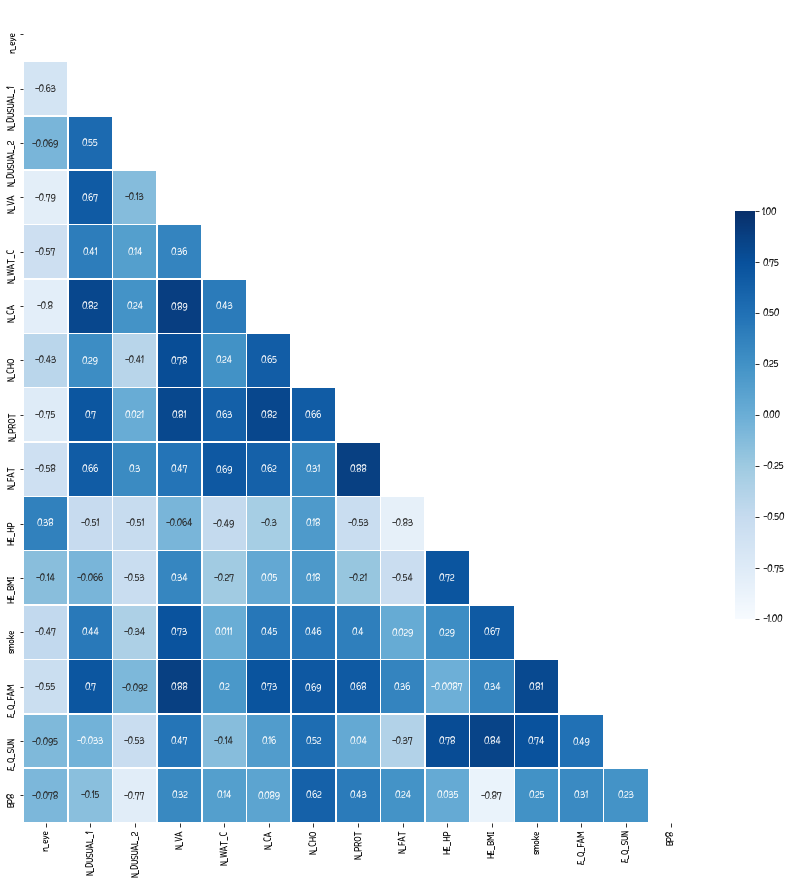

In [47]:
# 상관분석  __ 변수 추리기

data = pd.read_csv("FIFY/분석/08_12_TOTAL_2.csv")
plt.figure(figsize=(15,15))

mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data = data.corr(), 
            cmap='Blues', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

plt.savefig("FIFY/heatmap.png", transparent = True)

In [56]:
# OLS분석

res = ols('n_eye ~ N_VA + N_WAT_C + N_CA + N_CHO + N_PROT + N_FAT + HE_HP + HE_BMI + smoke + E_Q_FAM + E_Q_SUN + BP8', data=data)
res = res.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  n_eye   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     42.26
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           2.05e-06
Time:                        16:32:35   Log-Likelihood:                -73.629
No. Observations:                  22   AIC:                             173.3
Df Residuals:                       9   BIC:                             187.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    586.0039    517.633      1.132      0.287    -584.964    1756.972
N_VA          -0.7721      0.185     -4.182      0.002      -1.190      -0.354
N_WAT_C      -15.7663      3.375     -4.671      0.001     -23.401      -8.131
N_CA          -1.1513      0.559     -2.060      0.070      -2.416       0.113
N_CHO         -1.8216      0.688     -2.649      0.027      -3.377      -0.266
N_PROT        29.9887      8.080      3.712      0.005      11.711      48.266
N_FAT        -10.4731      4.743     -2.208      0.055     -21.203       0.257
HE_HP          0.4246      0.066      6.409      0.000       0.275       0.574
HE_BMI       -22.1653     15.231     -1.455      0.180     -56.621      12.290
smoke         -0.0646      0.048     -1.351      0.210      -0.173       0.044
E_Q_FAM        0.3398      0.052      6.505      0.000       0.222       0.458
E_Q_SUN       -0.4415      0.111     -3.988      0.003      -0.692      -0.191
BP8           17.9854     30.698      0.586      0.572     -51.458      87.428
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.198
Skew:                           0.158   Prob(JB):                        0.906
Kurtosis:                       2.659   Cond. No.                     2.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
pd.DataFrame({'col' : column, 'VIF' : variance_inflation_factor(res.exog,i)}
            for i, column in enumerate(res.exog_names)
            if column != 'Intercept')

,col,VIF
0,N_VA,131.139806
1,N_WAT_C,2.505084
2,N_CA,205.667062
3,N_CHO,33.891315
4,N_PROT,1412.767425
5,N_FAT,709.447192
6,HE_HP,112.108337
7,HE_BMI,71.594266
8,smoke,23.436548
9,E_Q_FAM,13.119275


In [241]:
# OLS분석  __ 10대

data = pd.read_csv("FIFY/분석/merge_10대.csv")
data.set_index('year',inplace = True)
res = ols('n_eye ~ N_DUSUAL_1 + N_DUSUAL_2 + N_VA + N_WAT_C + N_CA + N_CHO + N_FAT + HE_HP + HE_BMI + smoke + E_Q_SUN + E_Q_FAM', data=data).fit()
res.summary()

C:\Users\dbswj\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\dbswj\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\dbswj\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\dbswj\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  n_eye   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                nan
Time:                        18:15:30   Log-Likelihood:                 147.39
No. Observations:                   5   AIC:                            -284.8
Df Residuals:                       0   BIC:                            -286.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020        inf          0        nan         nan         nan
N_DUSUAL_1     0.5339        inf          0        nan         nan         nan
N_DUSUAL_2     0.1207        inf          0        nan         nan         nan
N_VA           0.0593        inf          0        nan         nan         nan
N_WAT_C        0.2048        inf          0        nan         nan         nan
N_CA           0.2096        inf          0        nan         nan         nan
N_CHO         -0.7724        inf         -0        nan         nan         nan
N_FAT         -0.5062        inf         -0        nan         nan         nan
HE_HP         -0.0633        inf         -0        nan         nan         nan
HE_BMI         0.0460        inf          0        nan         nan         nan
smoke          0.8403        inf          0        nan         nan         nan
E_Q_SUN       -0.5583        inf         -0        nan         nan         nan
E_Q_FAM        0.9243        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.667
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.638
Skew:                           0.000   Prob(JB):                        0.727
Kurtosis:                       1.250   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [256]:
# 2031년 독립변수 구하기

age = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']
for i in age :
    nl = []
    nl2 = []
    df = pd.read_csv("FIFY/분석/merge_"+ str(i) +".csv")
    x = df.year.values.reshape(-1,1)
    y = df.N_DUSUAL_1
    y2 = df.N_DUSUAL_2
    y3 = df.N_VA
    y4 = df.N_WAT_C
    y5 = df.N_CA
    y6 = df.N_CHO
    y7 = df.N_FAT
    y8 = df.HE_HP
    y9 = df.HE_BMI
    y10 = df.smoke
    y11 = df.E_Q_SUN
    y12 = df.E_Q_FAM
    col = [y, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12]
    lr = LinearRegression()
    for j in col :
        lr.fit(x, j)
        d = lr.predict([[2031]])
        d2 = lr.coef_
        nl.append(d)
    a = pd.DataFrame({'year' : ['N_DUSUAL_1', 'N_DUSUAL_2', 'N_VA', 'N_WAT_C', 'N_CA', 'N_CHO', 'N_FAT', 'HE_HP', 'HE_BMI', 'smoke', 'E_Q_SUN', 'E_Q_FAM'], 
                      '2031' : nl})
    a['2031'] = a['2031'].astype(float)
    a = a.T
    a.reset_index(inplace = True)
    a.columns = a.iloc[0,:]
    a.drop(0,axis = 0, inplace = True)
    a.set_index('year',inplace = True)
    a.to_csv('FIFY/분석/분석_'+str(i)+'.csv')

In [257]:
# 2031년 종속변수 구하기

age = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']
#age = ['30대']
bb = pd.DataFrame(index=range(1), columns=['age', 'total', 'N_DUSUAL_1', 'N_DUSUAL_2', 'N_VA', 'N_WAT_C', 'N_CA', 'N_CHO', 'N_FAT', 'HE_HP', 'HE_BMI', 'smoke', 'E_Q_SUN', 'E_Q_FAM'])
for i in age :
    df = pd.read_csv('FIFY/분석/분석_'+str(i)+'.csv')
    df.set_index('year', inplace = True)
    df2 = pd.read_csv("FIFY/분석/merge_"+str(i)+".csv")
    df2.set_index('year',inplace = True)
    res =  ols('n_eye ~ N_DUSUAL_1 + N_DUSUAL_2 + N_VA + N_WAT_C + N_CA + N_CHO + N_FAT + HE_HP + HE_BMI + smoke + E_Q_SUN + E_Q_FAM', data=df2).fit()
    k = pd.DataFrame({'coef' : res.params})
    l = 0
    for j in range(len(df.columns)) :
        l = l + df.iloc[0,j] * k.iloc[j+1,0]
    l = l + k.iloc[0,0]
    df.insert(0,'age',str(i))
    df.insert(1,'total',l)
    df.reset_index(drop = True, inplace = True)
    bb = bb.append(pd.Series(df.loc[0,:], index=df.columns))
    
bb.reset_index(drop = True, inplace = True)
bb.drop(index = bb.index[0], inplace = True)
bb.reset_index(drop = True, inplace = True)   
bb.to_csv('FIFY/분석/2031_total.csv', index = None)

In [2]:
# Raw Data로 뽑아보기
hn = pd.read_csv("FIFY/국민건강영양조사/hn18_all.csv")
hn = hn[['age', 'E_Cl_1', 'E_Cr_1','N_DUSUAL', 'N_VA', 'N_WAT_C', 'N_CA', 'N_CHO', 'N_FAT', 'N_PROT', 'HE_HP', 'HE_BMI', 'BS3_1']]

n_eye = []
for i in range(len(hn.index)) :
    if hn.loc[i,'E_Cl_1'] < hn.loc[i,'E_Cr_1'] :
        n_eye.append(hn.loc[i,'E_Cr_1'])
    else :
        n_eye.append(hn.loc[i,'E_Cl_1'])
hn.insert(0,'EYE',n_eye)
hn = hn[['EYE', 'age','N_DUSUAL', 'N_VA', 'N_WAT_C', 'N_CA', 'N_CHO', 'N_FAT', 'N_PROT', 'HE_HP', 'HE_BMI', 'BS3_1']]
hn['EYE'].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12, 13:0 , 14:0, 15:0, 16:0, 88:0, 99:0}, inplace = True)

nl = []
for i in hn['N_DUSUAL'] :
    if i == 1 :
        nl.append(i)
    else :
        nl.append(0)
hn.insert(2, 'N_DUSUAL_1', nl)
hn['N_DUSUAL'].replace({1:0, 2:0, 3:1}, inplace = True)
hn.rename({'N_DUSUAL' : 'N_DUSUAL_2'}, axis = 1, inplace = True)

hn['HE_HP'].replace({1:0, 2:0, 3:1}, inplace = True)
hn['BS3_1'].replace({1:1, 2:1, 3:0, 8:0, 9:0}, inplace = True)
hn

C:\Users\dbswj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (146,209,220,274,283,318,339,355,425,436,555,570,572,587) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,EYE,age,N_DUSUAL_1,N_DUSUAL_2,N_VA,N_WAT_C,N_CA,N_CHO,N_FAT,N_PROT,HE_HP,HE_BMI,BS3_1
0,0.0,80,0.0,0.0,1362.86,2.5,1034.57,369.08,39.08,83.08,1.0,24.7,0.0
1,0.0,73,0.0,1.0,420.37,2.0,235.30,154.25,18.06,29.75,0.0,24.6,0.0
2,0.0,63,0.0,0.0,1058.40,8.0,841.44,489.26,57.58,86.03,1.0,25.9,1.0
3,12.0,58,0.0,0.0,373.69,7.5,618.21,373.71,31.93,72.19,1.0,25.9,0.0
4,0.0,55,1.0,0.0,649.68,3.5,859.07,245.23,46.88,113.97,0.0,25.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,0.0,78,0.0,0.0,127.83,5.0,171.64,268.76,15.04,49.95,1.0,26.0,0.0
7988,0.0,69,0.0,0.0,103.42,4.0,295.01,146.39,11.23,24.95,1.0,28.9,0.0
7989,0.0,62,0.0,0.0,295.93,5.0,296.22,274.30,20.81,40.65,0.0,31.3,0.0
7990,0.0,79,0.0,0.0,57.17,2.0,197.19,255.84,22.92,43.11,0.0,20.4,1.0


<ipython-input-5-36b036e6e2f1>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

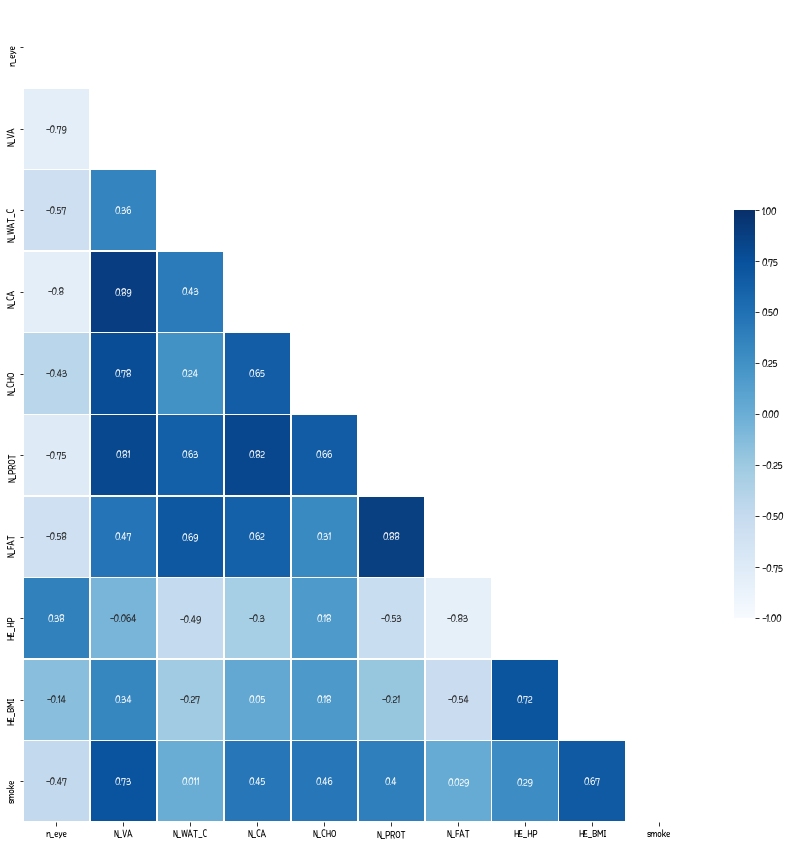

In [5]:
# 상관분석
data = pd.read_csv("FIFY/분석/08_12_TOTAL.csv")
data.drop('N_DUSUAL_1', axis = 1, inplace = True)
data.drop('N_DUSUAL_2', axis = 1, inplace = True)
plt.figure(figsize=(15,15))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data = data.corr(), 
            cmap='Blues', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

#plt.savefig("FIFY/heatmap.png", transparent = True)

In [14]:
# OLS분석  __ 10대

res = ols('n_eye ~ N_VA + N_WAT_C + N_CA + N_CHO + N_FAT + HE_HP + HE_BMI + smoke', data=data)
res = res.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  n_eye   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     10.99
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           0.000116
Time:                        15:42:08   Log-Likelihood:                -95.623
No. Observations:                  22   AIC:                             209.2
Df Residuals:                      13   BIC:                             219.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    743.6543    404.205      1.840      0.089    -129.578    1616.886
N_VA          -0.0270      0.314     -0.086      0.933      -0.706       0.652
N_WAT_C      -16.1271      7.302     -2.209      0.046     -31.902      -0.352
N_CA          -0.9308      0.705     -1.319      0.210      -2.455       0.593
N_CHO          1.0483      0.908      1.155      0.269      -0.913       3.010
N_FAT          1.8569      1.649      1.126      0.280      -1.704       5.418
HE_HP          0.0903      0.052      1.724      0.108      -0.023       0.204
HE_BMI       -22.3263     16.454     -1.357      0.198     -57.872      13.220
smoke          0.0366      0.055      0.668      0.516      -0.082       0.155
==============================================================================
Omnibus:                        2.187   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.430
Skew:                           0.379   Prob(JB):                        0.489
Kurtosis:                       2.007   Cond. No.                     9.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
pd.DataFrame({'col' : column, 'VIF' : variance_inflation_factor(res.exog,i)}
            for i, column in enumerate(res.exog_names)
            if column != 'Intercept')


,col,VIF
0,N_VA,74.277119
1,N_WAT_C,2.293440
2,N_CA,64.085872
3,N_CHO,11.556962
4,N_FAT,16.760705
5,HE_HP,13.711796
6,HE_BMI,16.341099
7,smoke,6.026530
